In [64]:
import pandas 

In [65]:
with open('nba_2013.csv','r') as csvfile:
    nba = pandas.read_csv(csvfile)

# Importing the required libraries

In [66]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [67]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [68]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [69]:
print(nba.columns.values)
column=nba.columns.values

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [70]:
nba.drop(columns=['player','pos','bref_team_id','season','season_end'],axis=1,inplace=True)

In [71]:
nba.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,NaN,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [72]:
X=nba.iloc[:,0:25].values
Y=nba.iloc[:,25].values


# Managing missing values

In [74]:
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
X=imputer.fit_transform(X)


# Splitting training and test dataset

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
y_train=Y_train.ravel()
y_test=Y_test.ravel()

# Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Fitting the model and calculating RMSE

In [110]:
rmse_val=[] #to store rmse values for different K
for K in range(0,10):
    K_value=K+1
    model=KNeighborsRegressor(n_neighbors=K_value,weights='uniform',algorithm='auto')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error=sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for K=',K_value,'is',error)

RMSE value for K= 1 is 114.95417377792559
RMSE value for K= 2 is 98.23494005839197
RMSE value for K= 3 is 96.54272276048394
RMSE value for K= 4 is 97.5819483200199
RMSE value for K= 5 is 94.9373964324876
RMSE value for K= 6 is 94.86298447632137
RMSE value for K= 7 is 96.53209768352109
RMSE value for K= 8 is 96.85766474485943
RMSE value for K= 9 is 99.17663418359375
RMSE value for K= 10 is 98.76418518806334


# Elbow Method

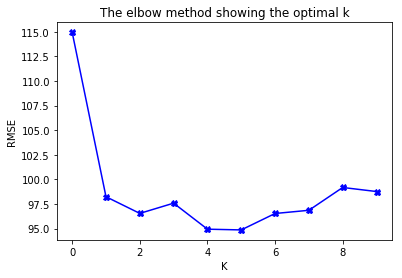

In [116]:
 #ploting the rmse values against k values
K=range(10)    
plt.plot(K,rmse_val,'bX-')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('The elbow method showing the optimal k')
plt.show()

As we discussed,when we take K=1,we get a very high RMSE value .The RMSE value decreases as we increase k_value.
we can safely say that k=5 or 6 will give us the best result inthis case.

# GridSearchCV method to find K value

In [105]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
Knn=KNeighborsRegressor()
model=GridSearchCV(Knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 6}

we can get the same k value  is 6 by using gridsearchCV